In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [1]:
fname='D:/ML_basics_Python/datasets/housing/diabetes_two (1).csv'

In [3]:
df=pd.read_csv(fname)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.isnull().sum()

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [24]:
df2=df
df2['Age']=df2['Age'].fillna(df2['Age'].mean()) #fill nan value with mean of the column
df2['Age'].isnull().sum()
df2

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.000000,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.000000,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,49.082852,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.000000,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.000000,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.000000,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.000000,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.000000,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.000000,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [25]:
A=df2['Gender'].mode() #find the most frequent value
df2['Gender'].replace ([np.nan],[A],inplace=True)
df2['Gender'].isnull().sum()

0

In [26]:

df2['weakness'].fillna(method='ffill', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13804\1810018975.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['weakness'].fillna(method='ffill', inplace=True)


In [28]:
df2.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [29]:
len(df2)

520

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
DF=df2
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            520 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [33]:
#its importanct to convert object datatypes to numerical values for device understanding
DF['Gender']=le.fit_transform(DF['Gender'])
DF['Polyuria']=le.fit_transform(DF['Polyuria'])
DF['Polydipsia']=le.fit_transform(DF['Polydipsia'])
DF['sudden weight loss']=le.fit_transform(DF['sudden weight loss'])
DF['weakness']=le.fit_transform(DF['weakness'])
DF['Polyphagia']=le.fit_transform(DF['Polyphagia'])
DF['Genital thrush']=le.fit_transform(DF['Genital thrush'])
DF['visual blurring']=le.fit_transform(DF['visual blurring'])
DF['Itching']=le.fit_transform(DF['Itching'])
DF['Irritability']=le.fit_transform(DF['Irritability'])
DF['delayed healing']=le.fit_transform(DF['delayed healing'])
DF['partial paresis']=le.fit_transform(DF['partial paresis'])
DF['muscle stiffness']=le.fit_transform(DF['muscle stiffness'])
DF['Alopecia']=le.fit_transform(DF['Alopecia'])
DF['Obesity']=le.fit_transform(DF['Obesity'])
DF['class']=le.fit_transform(DF['class'])


In [34]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    int64  
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    520 non-null    int64  
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

In [35]:
value_counts= DF.groupby('class').size().reset_index(name='count')
print(value_counts)

   class  count
0      0    200
1      1    320


In [37]:
z_score=(DF['Age']-DF['Age'].mean())/DF['Age'].std()
for i in z_score:
    if i<-3:
        print('outlier',i)
    elif i>3:
        print('outlier',i)
    else:
        continue


outlier 20.345636225068564


In [39]:
index = z_score.index[z_score == 20.345636225068564][0]
index
DF['Age'][index]=DF['Age'].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_13804\1620939469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Age'][index]=DF['Age'].mean()


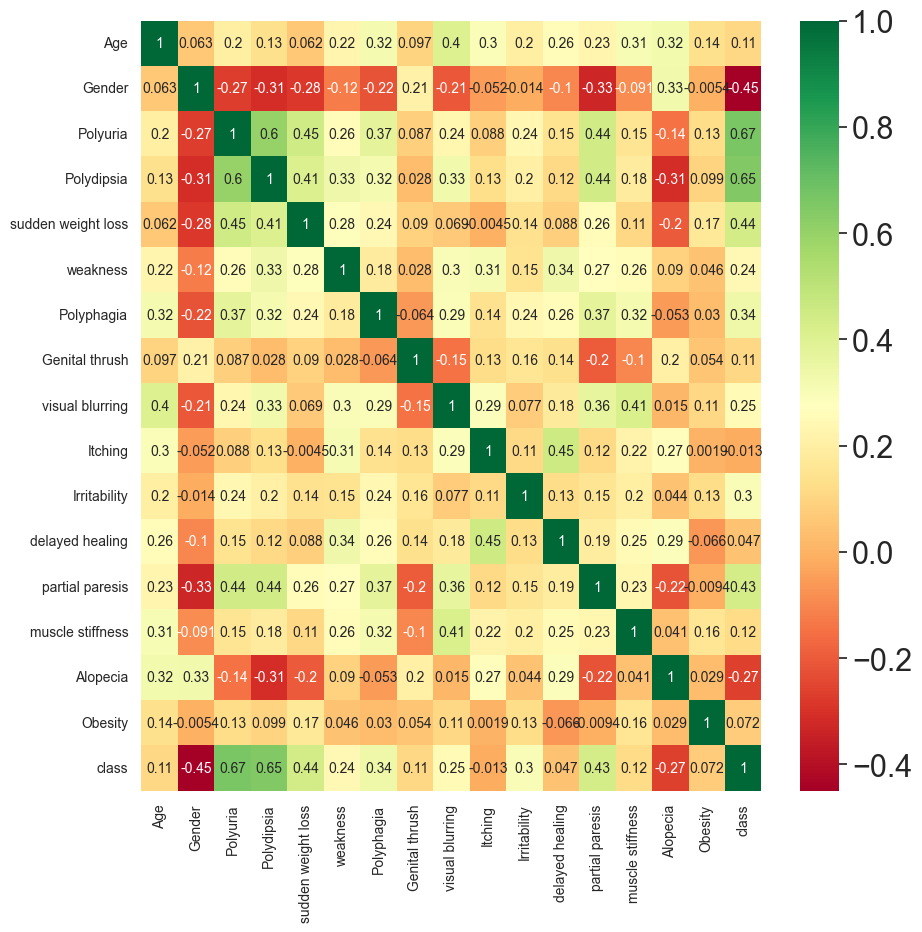

In [41]:
sns.set(font_scale=2)
plt.subplots(figsize=(10,10))
heat_plot= sns.heatmap(DF.corr(method='pearson'),annot=True,cmap='RdYlGn',annot_kws={'size':10})

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)



plt.show()

In [42]:
correlations= DF.corr(method='pearson')
print(correlations['class'].sort_values(ascending=False).to_string())

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108459
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233


In [43]:
#DF['class'].iloc[0:200]
from sklearn.utils import shuffle
shuffled_df=shuffle(DF)

In [44]:
rearranged_df= shuffled_df.reset_index(drop=True)
rearranged_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,50.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
1,72.0,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0,0
2,28.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,53.0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1
4,67.0,1,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,66.0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
516,67.0,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0
517,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
518,56.0,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0,1


In [49]:
X = rearranged_df.drop(columns=['class','Itching','Alopecia','Gender'])
Y = rearranged_df['class']

In [50]:
X

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,delayed healing,partial paresis,muscle stiffness,Obesity
0,50.0,0,0,0,1,0,0,1,0,1,0,0,0
1,72.0,1,0,0,0,1,0,1,0,1,1,1,0
2,28.0,0,0,1,0,0,0,0,0,0,0,0,0
3,53.0,0,0,1,1,0,0,1,0,1,0,0,0
4,67.0,0,1,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,66.0,1,0,1,0,0,1,0,1,0,0,0,0
516,67.0,1,0,0,1,1,0,1,1,1,0,1,1
517,35.0,0,0,0,0,0,0,0,0,0,0,0,0
518,56.0,1,0,1,1,0,1,0,1,0,0,0,0


In [51]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
515    1
516    0
517    1
518    1
519    0
Name: class, Length: 520, dtype: int64

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [53]:
STD_scaler = StandardScaler()
STD_scaler_X= STD_scaler.fit_transform(X)
STD_scaler_X

array([[ 0.16302325, -0.99233705, -0.90102535, ..., -0.86991767,
        -0.77459667, -0.45133547],
       [ 1.97750448,  1.00772212, -0.90102535, ...,  1.14953407,
         1.29099445, -0.45133547],
       [-1.65145797, -0.99233705, -0.90102535, ..., -0.86991767,
        -0.77459667, -0.45133547],
       ...,
       [-1.07412304, -0.99233705, -0.90102535, ..., -0.86991767,
        -0.77459667, -0.45133547],
       [ 0.65788177,  1.00772212, -0.90102535, ..., -0.86991767,
        -0.77459667, -0.45133547],
       [-0.66174094, -0.99233705,  1.10984668, ...,  1.14953407,
         1.29099445, -0.45133547]])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test= train_test_split(STD_scaler_X,Y, test_size=0.20)

In [56]:
print("train data size (features):",len(x_train))
print("train data size (target):",len(y_train))
print("test data size (features):",len(x_test))
print("test data size (target):",len(y_test))

train data size (features): 416
train data size (target): 416
test data size (features): 104
test data size (target): 104


<h1> K fold cross Validation

In [59]:
from sklearn.svm import SVC
SVC_model=SVC(C=0.5,kernel='poly',degree=2,gamma='scale',coef0=0.0,tol=0.0001,decision_function_shape='ovr')


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(10)

accuracy = cross_val_score(SVC_model, x_train,y_train, cv=k_fold,scoring='accuracy')
precision = cross_val_score(SVC_model, x_train,y_train, cv=k_fold,scoring='precision')
recall = cross_val_score(SVC_model, x_train,y_train, cv=k_fold,scoring='recall')
f1_score = cross_val_score(SVC_model, x_train,y_train, cv=k_fold,scoring='f1')
AUC = cross_val_score(SVC_model, x_train,y_train, cv=k_fold,scoring='roc_auc')


In [61]:
accuracy

array([0.78571429, 0.83333333, 0.76190476, 0.83333333, 0.83333333,
       0.83333333, 0.85365854, 0.87804878, 0.87804878, 0.87804878])

In [62]:
overall_accuracy = sum(accuracy)/len(accuracy)
print(overall_accuracy)

0.836875725900116


<h1> Model performance on test data

In [63]:
SVC_model=SVC(C=0.5,kernel='poly',degree=2,gamma='scale',coef0=0.0,tol=0.0001,decision_function_shape='ovr')

In [64]:
SVC_model.fit(x_train,y_train)

SVC(C=0.5, degree=2, kernel='poly', tol=0.0001)

In [65]:
unseen_prediction = SVC_model.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score

print("accuracy: ", accuracy_score(unseen_prediction,y_test))
print("precision: ", precision_score(unseen_prediction,y_test))
print("recall_score: ", recall_score(unseen_prediction,y_test))
print("f1_score: ", f1_score(unseen_prediction,y_test))
print("roc_auc_score: ", roc_auc_score(unseen_prediction,y_test))


accuracy:  0.8173076923076923
precision:  0.8169014084507042
recall_score:  0.90625
f1_score:  0.8592592592592593
roc_auc_score:  0.7906250000000001
